In [9]:
import pandas as pd

In [11]:
import numpy as np

In [13]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\1\Housing.csv") #loading the data set

In [15]:
df.shape

(545, 13)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [21]:
#Step 2: Exploratory Data Analysis(EDA)

In [23]:
#Now Data Is Loaded 
#.understand the structure
#.check for missing values
#.identify features correlated with target (saleprice)
#.visualize patterns

In [25]:
#Basic info

In [27]:
df.info() #get columns types and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [29]:
df.describe() #statistical summary of numeric columns

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [31]:
#check for missing values

In [33]:
df.isnull().sum().sort_values(ascending=False)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [35]:
#visualize the target variable

In [71]:
!pip install seaborn --upgrade

In [43]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [47]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

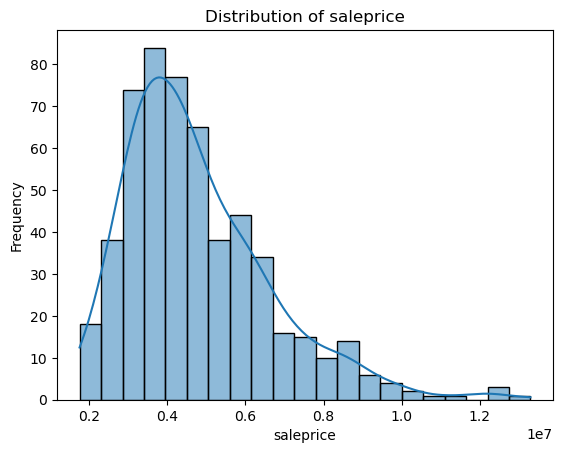

In [49]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("Frequency")
plt.show()

In [55]:
#Correlation Heatmap(Top features)

In [61]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [63]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

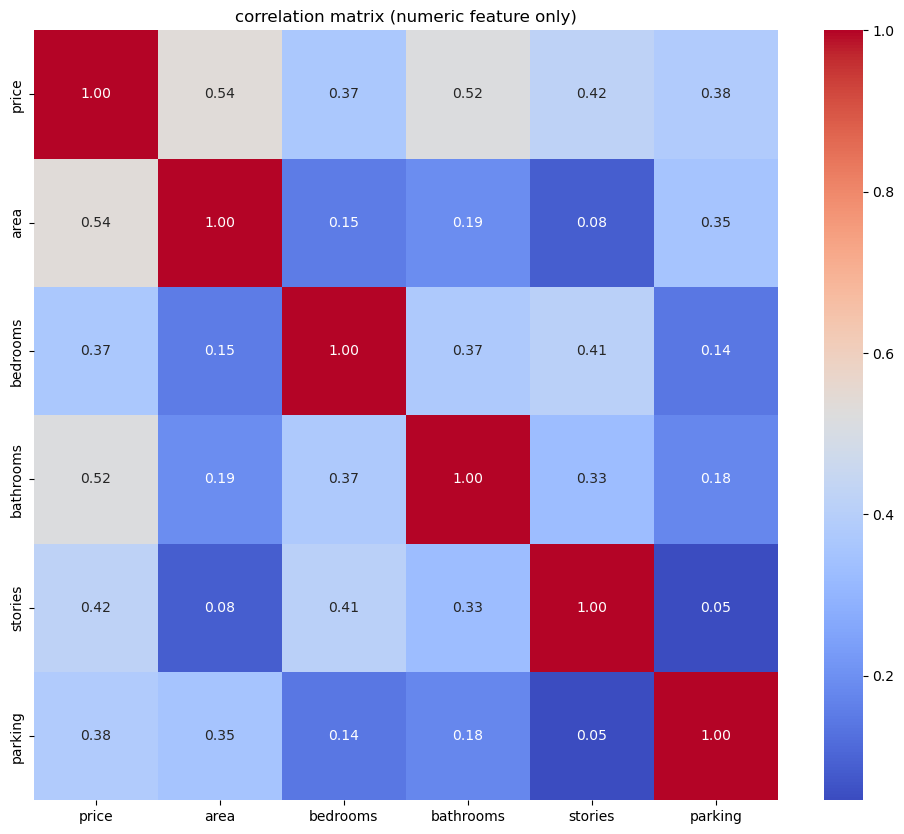

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix (numeric feature only)")
plt.show()

In [67]:
#Encoding the categorical features

In [69]:
#Since machine learning models need everything in numeric form, let’s convert the categorical features using One-Hot Encoding.

In [71]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [73]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [75]:
df_encoded = df_encoded.astype(int)

In [77]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
from sklearn.model_selection import train_test_split

In [91]:
#define feature x and target y

In [93]:
X= df_encoded.drop("price", axis=1)
y=df_encoded["price"]

In [95]:
#Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [97]:
#initialize the linear regression model
model = LinearRegression()

In [99]:
#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [101]:
#predict on the test set
y_pred =model.predict(X_test)

In [103]:
#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [105]:
#disply the result
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R²: 0.6529242642153184
